In [1]:
import os
import csv
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import scipy.optimize as opt
import scipy.stats as stat
from operator import itemgetter
import random
import numpy as np
import numpy.ma as ma
import numpy.linalg as la

pi = np.pi
sin = np.sin
cos = np.cos

In [2]:
os.chdir('..')
cwd = os.getcwd()
cwd

'/Users/mike_mckenna/Desktop/brain-diffusion/Chad_functions_and_unittests'

In [4]:
# Theoretical D (assuming spherical particles of hydrodynamic diameter (dh)): D = k*T/(3*pi*mu*dh)

k = 1.381e-23 # m^2*kg/K/s^2
T = 26 + 273 # K
dh_COOH = 124 # nm
dh_PEG = 154 # nm
mu = 0.8882 # cP

D_COOH = k*T/3/pi/0.8882*100/0.1/dh_COOH*1e9*(1e6**2)
D_PEG = k*T/3/pi/0.8882*100/0.1/dh_PEG*1e9*(1e6**2)
print(D_COOH)
print(D_PEG)

#Theoretical MSDs at different time points: MSD = 4*tau*D

MSD_COOH_one_sec = 4*1*D_COOH
MSD_PEG_one_sec = 4*1*D_PEG
print(MSD_COOH_one_sec)
print(MSD_PEG_one_sec)

3.9779680026150706
3.20303917093681
15.911872010460282
12.81215668374724


In [11]:
example_taus = [0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4, 4.25, 4.5, 4.75, 5]
example_MSDs = np.zeros(6)
i = 1
while i < len(example_taus)+1:
    example_MSDs[i-1] = D_COOH*2*example_taus[i-1]
    i += 1

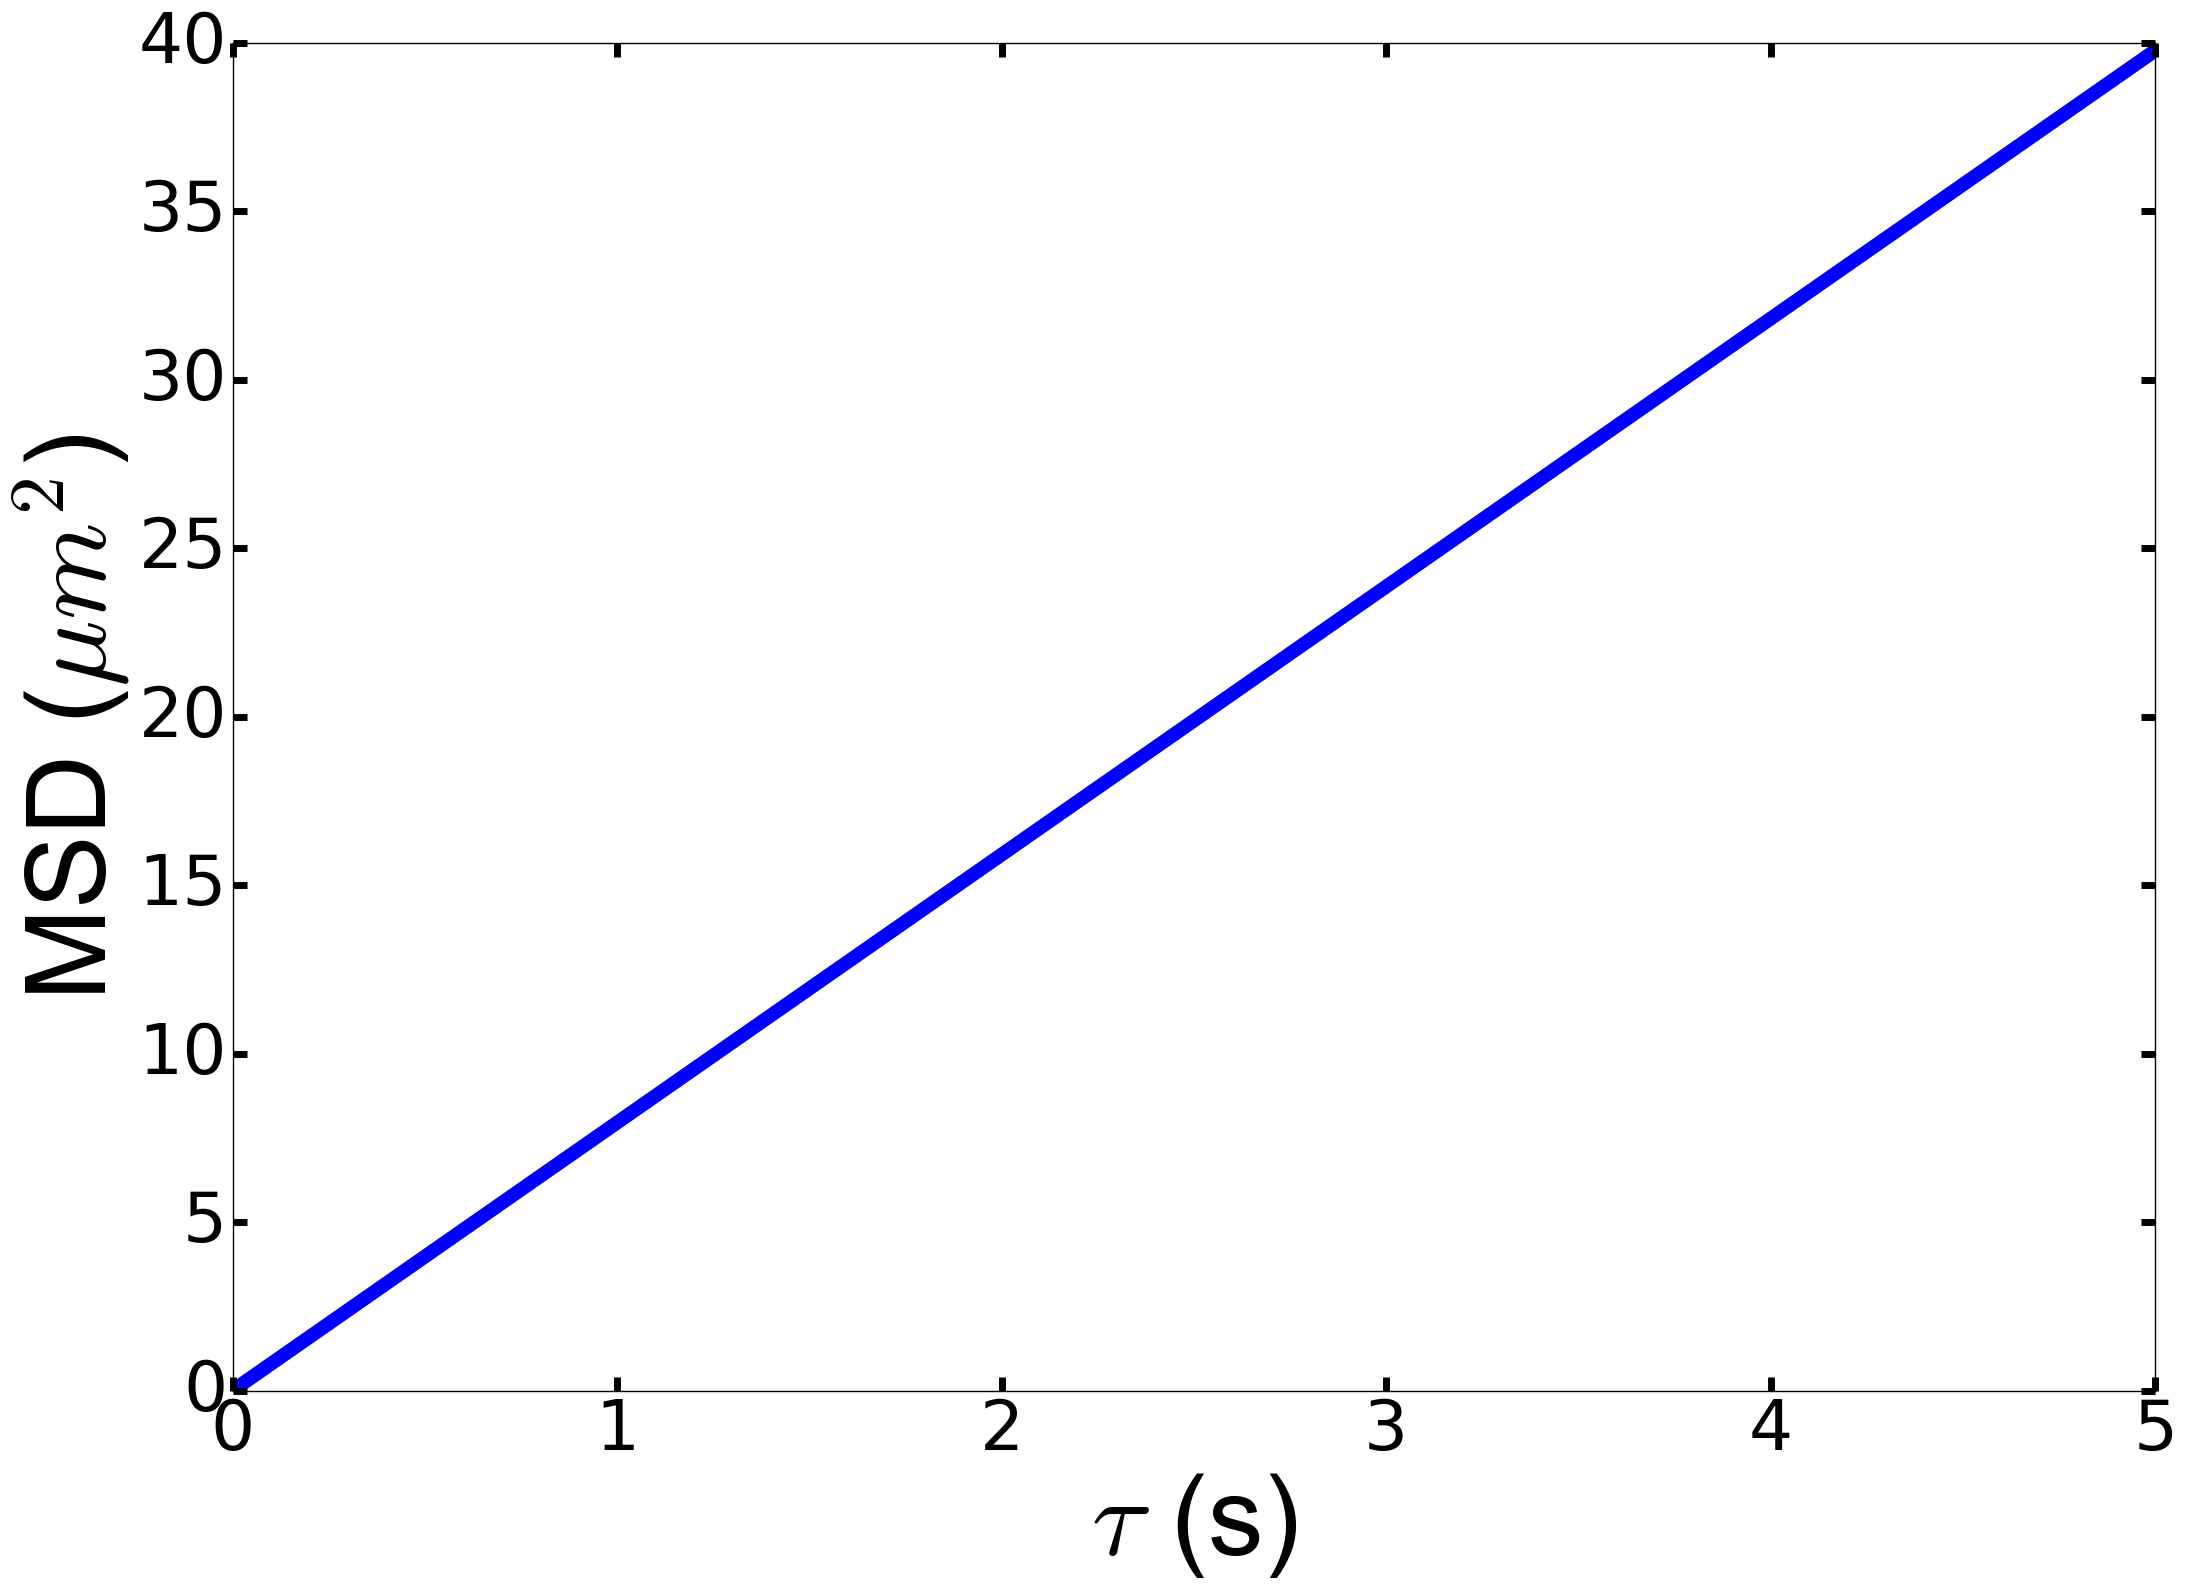

In [12]:
hfont = {'fontname':'Arial'}
fig = plt.figure(1,figsize=(22, 16), dpi=80)
ax = fig.add_subplot(111)
ax.plot(example_taus, example_MSDs, linewidth=10)
ax.tick_params(axis='both', which='major', labelsize=50)
ax.xaxis.set_tick_params(width = 5, length = 10)
ax.yaxis.set_tick_params(width = 5, length = 10)
plt.xlabel(r'$\tau$ (s)', fontsize = 80, **hfont)
plt.ylabel(r'MSD ($\mu m^2$)', fontsize=80, **hfont)
fig.tight_layout()
plt.show()
fig.savefig('example MSD plot for ppt.png', dpi=fig.dpi)

In [ ]:
MSD_dict_3 = dict()

MSD_dict_3[1] = np.genfromtxt('./Data_Files_Mike/8_12_17 - MPT_100nm_PS_varying agarose concentrations/geoM2xy_PS_COOH_in_0_1_agarose_gel_vid_1.csv', delimiter = ',')
MSD_dict_3[2] = np.genfromtxt('./Data_Files_Mike/8_12_17 - MPT_100nm_PS_varying agarose concentrations/geoM2xy_PS_COOH_in_0_2_agarose_gel_vid_1.csv', delimiter = ',')
MSD_dict_3[3] = np.genfromtxt('./Data_Files_Mike/8_12_17 - MPT_100nm_PS_varying agarose concentrations/geoM2xy_PS_COOH_in_0_4_agarose_gel_vid_1.csv', delimiter = ',')
MSD_dict_3[4] = np.genfromtxt('./Data_Files_Mike/8_12_17 - MPT_100nm_PS_varying agarose concentrations/geoM2xy_PS_COOH_in_0_8_agarose_gel_vid_1.csv', delimiter = ',')
MSD_dict_3[5] = np.genfromtxt('./Data_Files_Mike/8_12_17 - MPT_100nm_PS_varying agarose concentrations/geoM2xy_PS_PEG_in_0_1_agarose_gel_vid_1.csv', delimiter = ',')
MSD_dict_3[6] = np.genfromtxt('./Data_Files_Mike/8_12_17 - MPT_100nm_PS_varying agarose concentrations/geoM2xy_PS_PEG_in_0_2_agarose_gel_vid_1.csv', delimiter = ',')
MSD_dict_3[7] = np.genfromtxt('./Data_Files_Mike/8_12_17 - MPT_100nm_PS_varying agarose concentrations/geoM2xy_PS_PEG_in_0_4_agarose_gel_vid_1.csv', delimiter = ',')
MSD_dict_3[8] = np.genfromtxt('./Data_Files_Mike/8_12_17 - MPT_100nm_PS_varying agarose concentrations/geoM2xy_PS_PEG_in_0_8_agarose_gel_vid_1.csv', delimiter = ',')
MSD_dict_3[9] = np.genfromtxt('./Data_Files_Mike/8_12_17 - MPT_100nm_PS_varying agarose concentrations/new_geoM2xy_PS_COOH_in_0_1_agarose_gel_vid_1.csv', delimiter = ',')
MSD_dict_3[10] = np.genfromtxt('./Data_Files_Mike/8_12_17 - MPT_100nm_PS_varying agarose concentrations/new_2_geoM2xy_PS_COOH_in_0_1_agarose_gel_vid_1.csv', delimiter = ',')
MSD_dict_3[11] = np.genfromtxt('./Data_Files_Mike/8_12_17 - MPT_100nm_PS_varying agarose concentrations/new_8_geoM2xy_PS_COOH_in_0_1_agarose_gel_vid_1.csv', delimiter = ',')
MSD_dict_3[12] = np.genfromtxt('./Data_Files_Mike/8_12_17 - MPT_100nm_PS_varying agarose concentrations/new_2_geoM2xy_PS_COOH_in_0_2_agarose_gel_vid_1.csv', delimiter = ',')
MSD_dict_3[13] = np.genfromtxt('./Data_Files_Mike/8_12_17 - MPT_100nm_PS_varying agarose concentrations/new_2_geoM2xy_PS_COOH_in_0_4_agarose_gel_vid_1.csv', delimiter = ',')
MSD_dict_3[14] = np.genfromtxt('./Data_Files_Mike/8_12_17 - MPT_100nm_PS_varying agarose concentrations/new_2_geoM2xy_PS_COOH_in_0_8_agarose_gel_vid_1.csv', delimiter = ',')
MSD_dict_3[15] = np.genfromtxt('./Data_Files_Mike/8_12_17 - MPT_100nm_PS_varying agarose concentrations/new_2_geoM2xy_PS_PEG_in_0_1_agarose_gel_vid_1.csv', delimiter = ',')
MSD_dict_3[16] = np.genfromtxt('./Data_Files_Mike/8_12_17 - MPT_100nm_PS_varying agarose concentrations/new_2_geoM2xy_PS_PEG_in_0_2_agarose_gel_vid_1.csv', delimiter = ',')
MSD_dict_3[17] = np.genfromtxt('./Data_Files_Mike/8_12_17 - MPT_100nm_PS_varying agarose concentrations/new_2_geoM2xy_PS_PEG_in_0_4_agarose_gel_vid_1.csv', delimiter = ',')
MSD_dict_3[18] = np.genfromtxt('./Data_Files_Mike/8_12_17 - MPT_100nm_PS_varying agarose concentrations/new_2_geoM2xy_PS_PEG_in_0_8_agarose_gel_vid_1.csv', delimiter = ',')

In [ ]:
print(len(MSD_dict_3[1]))
print(len(MSD_dict_3[2]))
print(len(MSD_dict_3[3]))
print(len(MSD_dict_3[4]))
print(len(MSD_dict_3[5]))
print(len(MSD_dict_3[6]))
print(len(MSD_dict_3[7]))
print(len(MSD_dict_3[8]))